# Importng Liberaries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import folium
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Exploratory Data Analysis (EDA)

In [ ]:
df = pd.read_csv('/content/startup data.csv')

In [ ]:
df

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,...,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,...,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,...,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,...,c:33198,0,0,1,1,0,0,1.0000,1,acquired


In [ ]:
df['status'].value_counts()

,count
status,
acquired,597
closed,326


In [ ]:
df.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [ ]:
df.columns

Index(['Unnamed: 0', 'state_code', 'latitude', 'longitude', 'zip_code', 'id',
       'city', 'Unnamed: 6', 'name', 'labels', 'founded_at', 'closed_at',
       'first_funding_at', 'last_funding_at', 'age_first_funding_year',
       'age_last_funding_year', 'age_first_milestone_year',
       'age_last_milestone_year', 'relationships', 'funding_rounds',
       'funding_total_usd', 'milestones', 'state_code.1', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'object_id', 'has_VC', 'has_angel', 'has_roundA',
       'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants',
       'is_top500', 'status'],
      dtype='object')

In [ ]:
len(df.columns)

49

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [ ]:
df.shape

(923, 49)

In [ ]:
df['status'].value_counts()

,count
status,
acquired,597
closed,326


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum().sort_values(ascending=False).head(10)


,0
closed_at,588
Unnamed: 6,493
age_first_milestone_year,152
age_last_milestone_year,152
state_code.1,1
zip_code,0
id,0
Unnamed: 0,0
state_code,0
name,0


In [ ]:
df.isnull().sum().sum()

np.int64(1386)

In [ ]:
df.drop(['name', 'Unnamed: 0', 'id', 'object_id', 'state_code.1', 'city', 'zip_code', 'Unnamed: 6', 'state_code', 'founded_at', 'closed_at',
         'first_funding_at', 'last_funding_at', 'latitude', 'longitude','labels'], axis=1, inplace=True)

In [ ]:
df['age_first_milestone_year'].fillna(df['age_first_milestone_year'].median(), inplace=True)
df['age_last_milestone_year'].fillna(df['age_last_milestone_year'].median(), inplace=True)

/tmp/ipython-input-707279341.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age_first_milestone_year'].fillna(df['age_first_milestone_year'].median(), inplace=True)
/tmp/ipython-input-707279341.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df

In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
df

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,...,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,...,1,0,1,0,0,0,0,1.0000,0,acquired
1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,...,0,1,0,0,1,1,1,4.7500,1,acquired
2,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,...,0,0,0,1,0,0,0,4.0000,1,acquired
3,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,...,0,0,0,0,1,1,1,3.3333,1,acquired
4,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,...,0,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,0.5178,0.5178,0.5808,4.5260,9,1,1100000,2,1,0,...,0,0,0,1,0,0,0,6.0000,1,acquired
919,7.2521,9.2274,6.0027,6.0027,1,3,52000000,1,0,0,...,1,1,0,0,1,0,0,2.6667,1,closed
920,8.4959,8.4959,9.0055,9.0055,5,1,44000000,1,1,0,...,0,0,0,0,0,0,1,8.0000,1,closed
921,0.7589,2.8329,0.7589,3.8356,12,2,15500000,2,1,0,...,0,0,0,1,1,0,0,1.0000,1,acquired


In [ ]:
categorical_data=df.select_dtypes(include=['object']).columns
categorical_data

Index(['category_code', 'status'], dtype='object')

In [ ]:
numerical_data=df.select_dtypes(include=['number']).columns
numerical_data

Index(['age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'is_software', 'is_web', 'is_mobile',
       'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce',
       'is_biotech', 'is_consulting', 'is_othercategory', 'has_VC',
       'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD',
       'avg_participants', 'is_top500'],
      dtype='object')

# Data Visualizaton

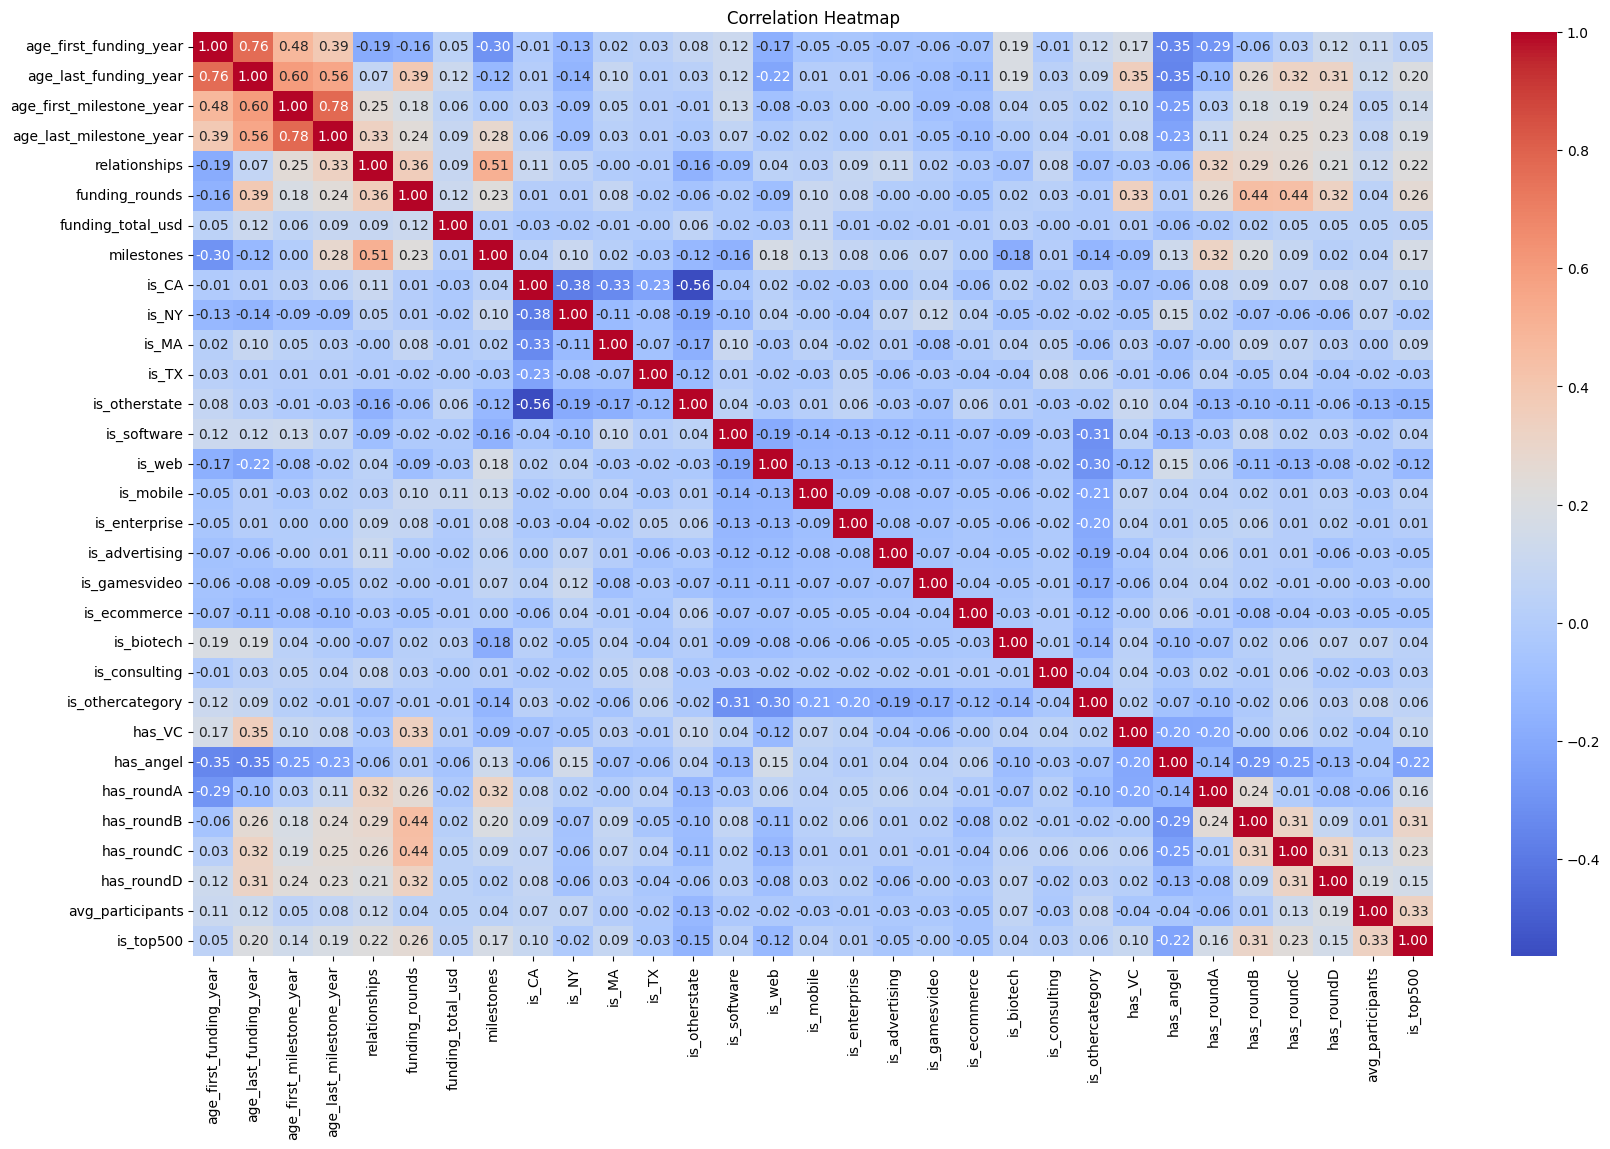

In [ ]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

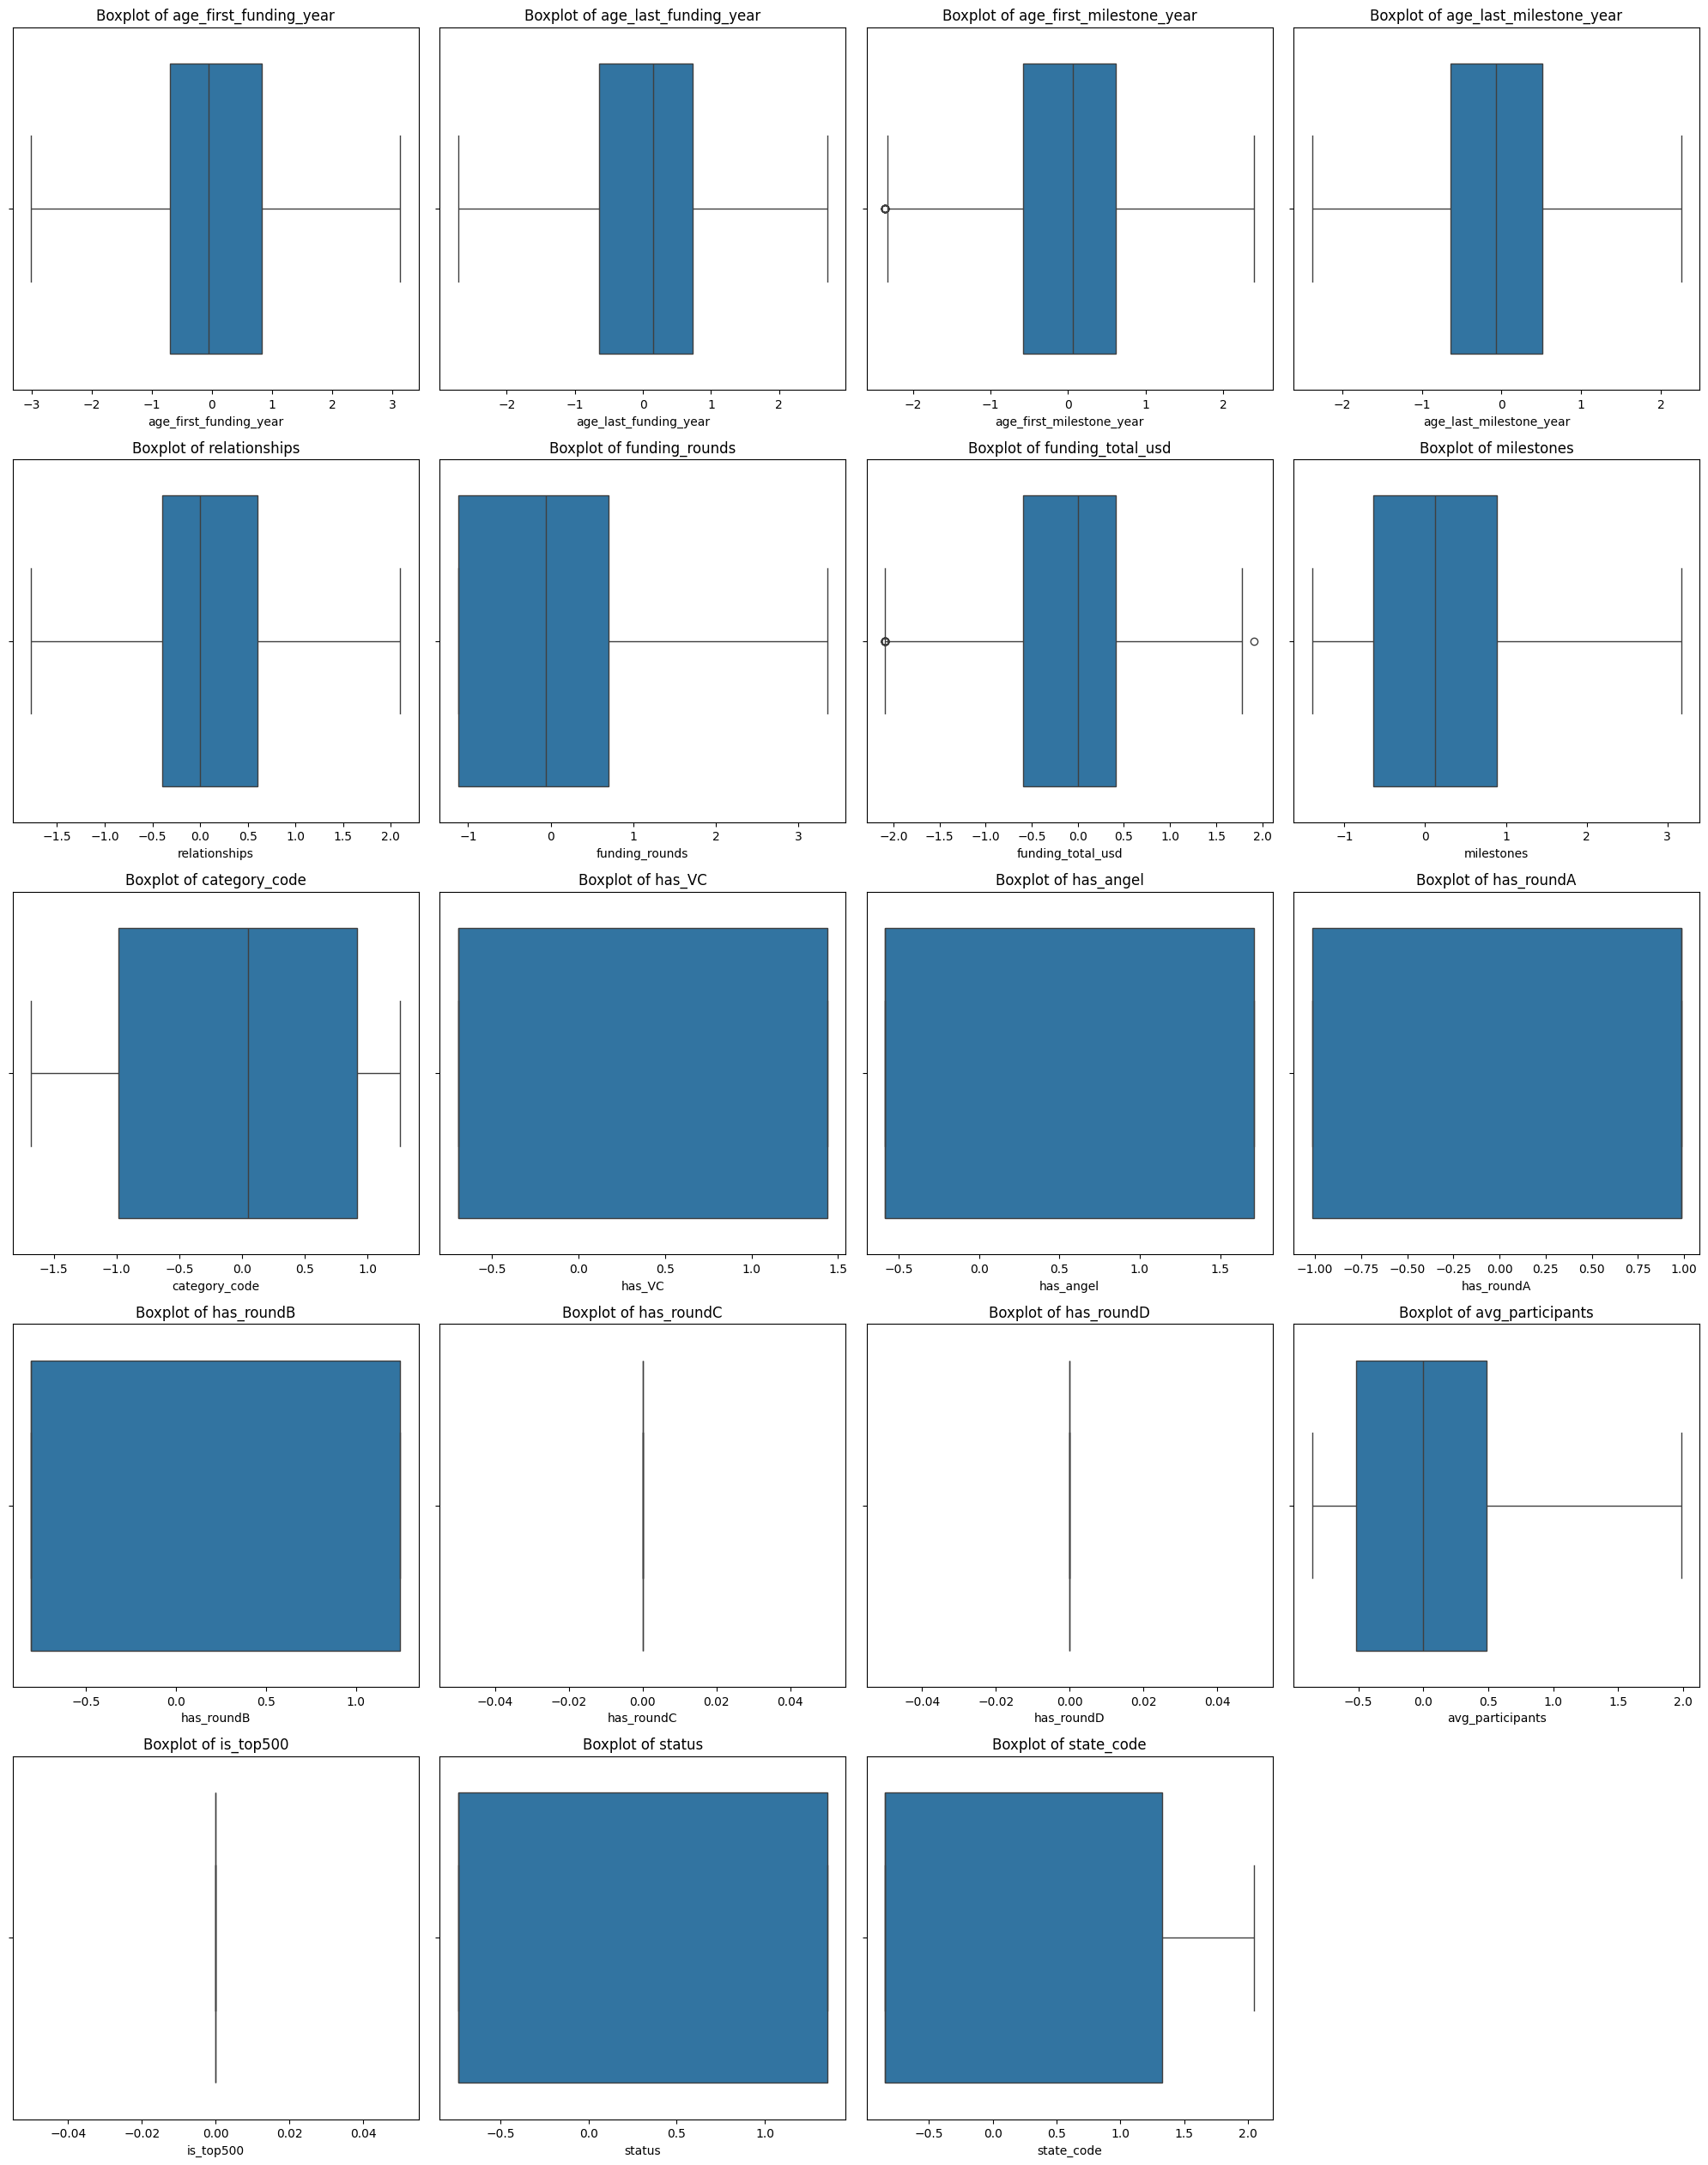

In [ ]:
plt.figure(figsize=(20, 40))
for i, col in enumerate(numerical_data, 1):
    plt.subplot(8, 4, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

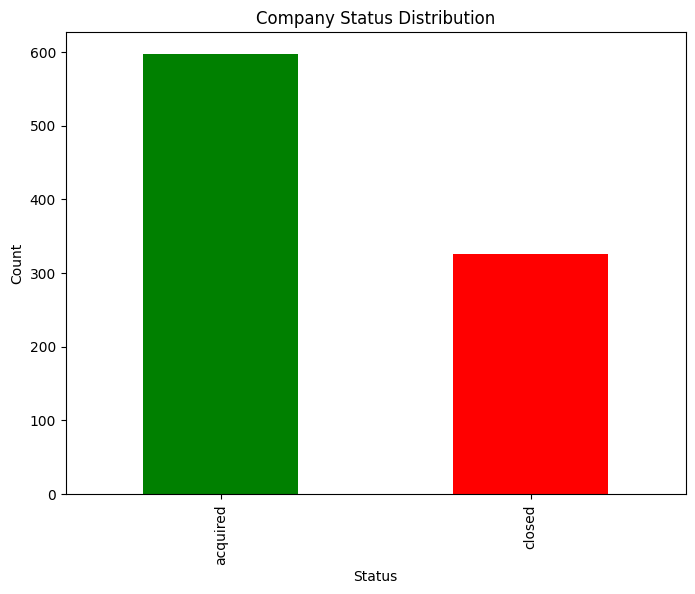

In [ ]:
df['status'].value_counts()

plt.figure(figsize=(8, 6))
df['status'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Company Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()


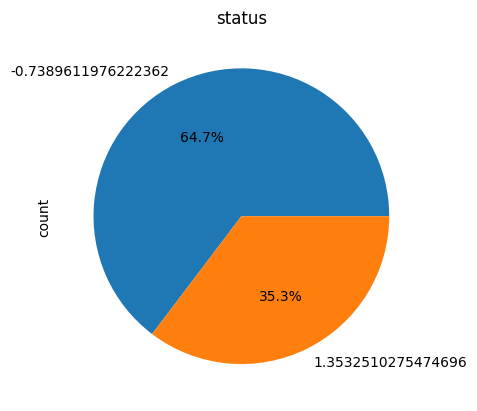

In [ ]:
df["status"].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("status")
plt.show()

In [ ]:
df.columns

Index(['age_first_funding_year', 'age_last_funding_year',
       'age_first_milestone_year', 'age_last_milestone_year', 'relationships',
       'funding_rounds', 'funding_total_usd', 'milestones', 'is_CA', 'is_NY',
       'is_MA', 'is_TX', 'is_otherstate', 'category_code', 'is_software',
       'is_web', 'is_mobile', 'is_enterprise', 'is_advertising',
       'is_gamesvideo', 'is_ecommerce', 'is_biotech', 'is_consulting',
       'is_othercategory', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB',
       'has_roundC', 'has_roundD', 'avg_participants', 'is_top500', 'status'],
      dtype='object')

In [ ]:
def get_state(row):
    if row['is_CA'] == 1:
        return 'CA'
    elif row['is_NY'] == 1:
        return 'NY'
    elif row['is_MA'] == 1:
        return 'MA'
    elif row['is_TX'] == 1:
        return 'TX'
    else:
        return 'Other'

df['state_code'] = df.apply(get_state, axis=1)

In [ ]:
df['state_code'].value_counts()


,count
state_code,
CA,487
Other,205
NY,106
MA,83
TX,42


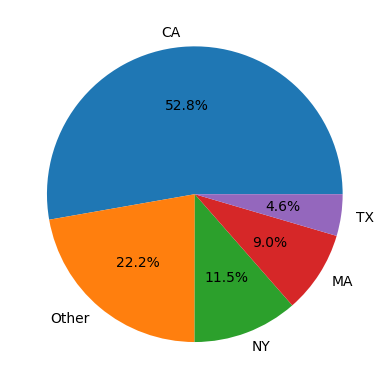

In [ ]:
state_count = df['state_code'].value_counts()
plt.pie(state_count.iloc[0:10], labels = state_count.iloc[0:10].index, autopct = '%1.1f%%', )
plt.show()

In [ ]:
df['category_code'].value_counts()

,count
category_code,
software,153
web,144
mobile,79
enterprise,73
advertising,62
games_video,52
semiconductor,35
biotech,34
network_hosting,34


In [ ]:
category = df['category_code'].value_counts()


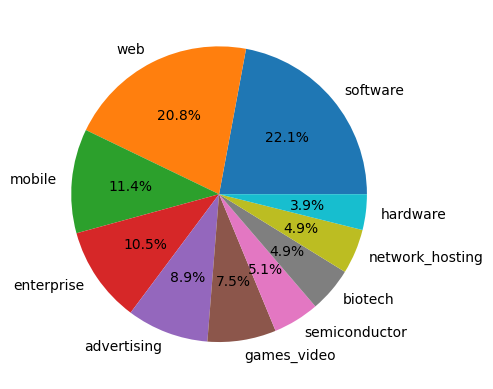

In [ ]:
category = df['category_code'].value_counts()
plt.pie(category.iloc[0:10], labels = category.iloc[0:10].index, autopct = '%1.1f%%')
plt.show()

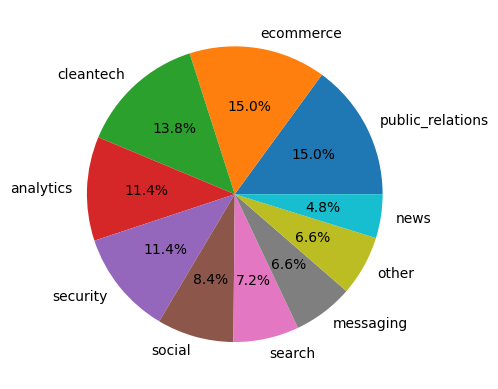

In [ ]:

plt.pie(category.iloc[10:20], labels=category.iloc[10:20].index, autopct='%1.1f%%')
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age_first_funding_year    923 non-null    float64
 1   age_last_funding_year     923 non-null    float64
 2   age_first_milestone_year  923 non-null    float64
 3   age_last_milestone_year   923 non-null    float64
 4   relationships             923 non-null    int64  
 5   funding_rounds            923 non-null    int64  
 6   funding_total_usd         923 non-null    int64  
 7   milestones                923 non-null    int64  
 8   is_CA                     923 non-null    int64  
 9   is_NY                     923 non-null    int64  
 10  is_MA                     923 non-null    int64  
 11  is_TX                     923 non-null    int64  
 12  is_otherstate             923 non-null    int64  
 13  category_code             923 non-null    object 
 14  is_softwar

<Axes: xlabel='status', ylabel='count'>

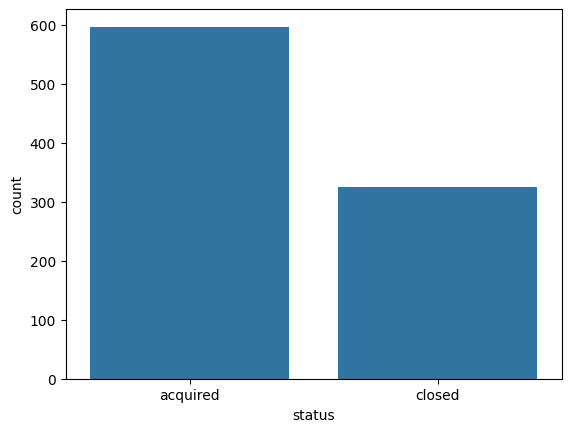

In [ ]:
sns.countplot(df, x='status')

In [ ]:
df['state_code'].nunique()

5

In [ ]:
df['state_code'] = df.apply(
    lambda row: 'CA' if row['is_CA'] == 1
    else 'NY' if row['is_NY'] == 1
    else 'MA' if row['is_MA'] == 1
    else 'TX' if row['is_TX'] == 1
    else 'Other', axis=1
)


In [ ]:
state_counts = df['state_code'].value_counts()


/tmp/ipython-input-109614600.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index, y=state_counts.values, palette='viridis')


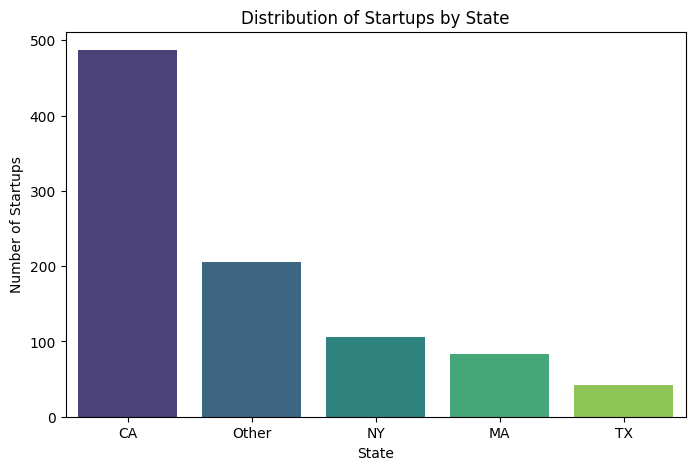

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=state_counts.index, y=state_counts.values, palette='viridis')
plt.title('Distribution of Startups by State')
plt.xlabel('State')
plt.ylabel('Number of Startups')
plt.show()

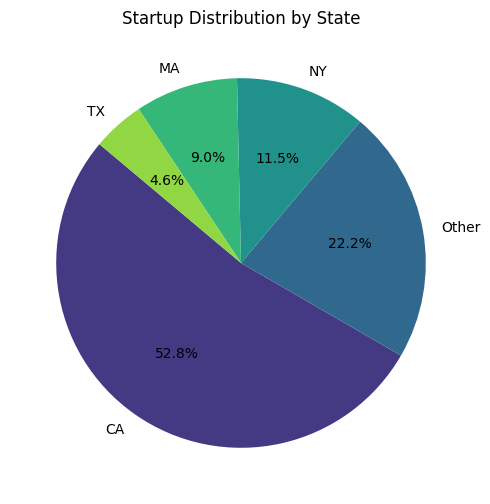

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(state_counts.values, labels=state_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(state_counts)))
plt.title('Startup Distribution by State')
plt.show()

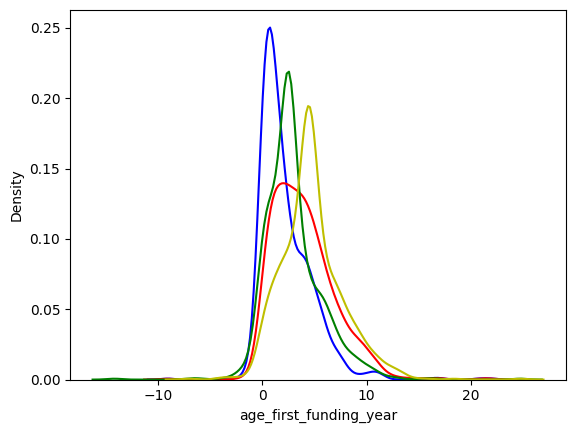

In [ ]:
sns.kdeplot(df, x = 'age_first_funding_year', color = 'b' )
sns.kdeplot(df, x = 'age_last_funding_year', color = 'r')
sns.kdeplot(df, x = 'age_first_milestone_year', color = 'g')
sns.kdeplot(df, x = 'age_last_milestone_year', color = 'y')
plt.show()

# Data Reprocessing

In [ ]:
df.drop([
    'Unnamed: 0', 'id','Unnamed: 6', 'name', 'labels', 'closed_at',
    'state_code.1', 'is_CA', 'is_NY', 'is_MA', 'is_TX',
    'is_otherstate', 'is_software', 'is_web', 'is_mobile',
    'is_enterprise', 'is_advertising', 'is_gamesvideo',
    'is_ecommerce', 'is_biotech', 'is_consulting',
    'is_othercategory', 'object_id', 'founded_at',
    'first_funding_at', 'last_funding_at'
], inplace=True, axis=1, errors='ignore')


In [ ]:
df.columns
len(df.columns)

19

In [ ]:
df['age_first_milestone_year'].fillna(df['age_first_milestone_year'].mean(), inplace = True)
df['age_last_milestone_year'].fillna(df['age_last_milestone_year'].mean(), inplace = True)

/tmp/ipython-input-2117661945.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age_first_milestone_year'].fillna(df['age_first_milestone_year'].mean(), inplace = True)
/tmp/ipython-input-2117661945.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

<Axes: >

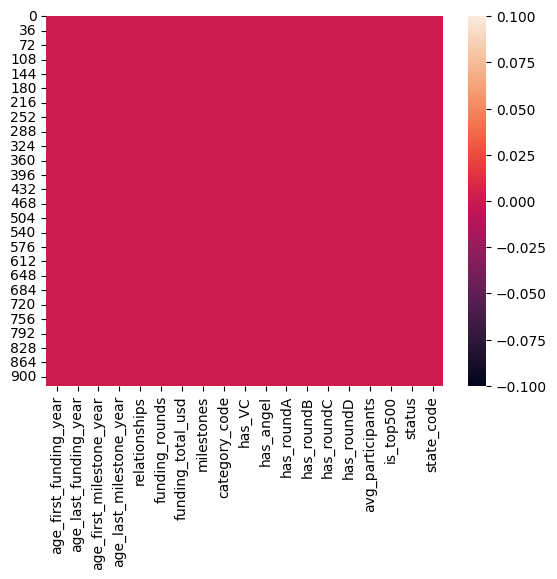

In [ ]:
sns.heatmap(df[df.columns].isna() )

In [ ]:
df.head(10)

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,category_code,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,state_code
0,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,music,0,1,0,0,0,0,1.0000,0,acquired,CA
1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,enterprise,1,0,0,1,1,1,4.7500,1,acquired,CA
2,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,web,0,0,1,0,0,0,4.0000,1,acquired,CA
3,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,software,0,0,0,1,1,1,3.3333,1,acquired,CA
4,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,games_video,1,1,0,0,0,0,1.0000,1,closed,CA
5,4.5452,4.5452,5.0027,5.0027,3,1,7500000,1,network_hosting,0,0,0,1,0,0,3.0000,1,closed,CA
6,1.7205,5.2110,3.0000,6.6082,6,3,26000000,2,software,1,0,1,1,0,0,1.6667,1,acquired,CA
7,1.6466,6.7616,5.6055,7.3616,25,3,34100000,3,finance,0,0,1,1,0,1,3.5000,1,acquired,CA
8,3.5863,11.1123,8.0055,9.9945,13,3,9650000,4,mobile,1,0,1,0,0,1,4.0000,1,acquired,MA
9,1.6712,4.6849,2.9178,6.1151,14,3,5750000,4,web,1,1,1,0,0,0,1.0000,1,acquired,CA


# Transformation And Encoding

In [ ]:
cat_columns = df.select_dtypes(include=['object'])

In [ ]:
cat_columns.head()

,category_code,status,state_code
0,music,acquired,CA
1,enterprise,acquired,CA
2,web,acquired,CA
3,software,acquired,CA
4,games_video,closed,CA


In [ ]:
le = LabelEncoder()
for column in cat_columns.columns:
    df[column] = le.fit_transform(df[column])

In [ ]:
numerical_data = df.select_dtypes(include=['number']).columns
skewed_cols = df[numerical_data].skew().sort_values(ascending=False)
skewed_cols = skewed_cols[skewed_cols > 1].index.tolist()

In [ ]:
for col in skewed_cols:
    df[col] = np.log1p(df[col])

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
def cap_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower, lower,
                          np.where(df[column] > upper, upper, df[column]))

for col in numerical_data:
    cap_outliers(col)

In [ ]:
from sklearn.preprocessing import RobustScaler, StandardScaler

robust_cols = ['funding_total_usd', 'avg_participants', 'relationships']
standard_cols = [col for col in numerical_data if col not in robust_cols]

rs = RobustScaler()
ss = StandardScaler()

df[robust_cols] = rs.fit_transform(df[robust_cols])
df[standard_cols] = ss.fit_transform(df[standard_cols])

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Label Encoding for target
le = LabelEncoder()
df['status_le'] = le.fit_transform(df['status'])


cat_cols = ['category_code', 'state_code']

preprocessor = ColumnTransformer(
    transformers=[
        ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)
    ],
    remainder='passthrough'

X = df.drop(columns=['status', 'status_le'])
y = df['status_le']

X_processed = preprocessor.fit_transform(X)

imputer = SimpleImputer(strategy='mean')
X_processed = imputer.fit_transform(X_processed)


In [ ]:
df.head()

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,category_code,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,state_code
0,0.332143,-0.050012,0.807572,0.764668,-0.400815,0.696482,-1.488814,0.883447,-0.036081,-0.695646,1.71104,-1.016386,-0.803291,0.0,0.0,-0.857879,0.0,-0.738961,-0.844596
1,1.245235,1.545707,1.345699,0.876934,0.504968,1.281849,0.629727,-0.639282,-0.987590,1.437514,-0.58444,-1.016386,1.244879,0.0,0.0,0.761027,0.0,-0.738961,-0.844596
2,-0.343172,-1.119696,-0.495298,-0.910976,0.000000,-1.121831,-0.610810,0.122082,1.261431,-0.695646,-0.58444,0.983879,-0.803291,0.0,0.0,0.546775,0.0,-0.738961,-0.844596
3,0.678026,0.669906,1.137071,0.503410,0.000000,0.696482,0.628594,-0.639282,0.915427,-0.695646,-0.58444,-1.016386,1.244879,0.0,0.0,0.327393,0.0,-0.738961,-0.844596
4,-1.364783,-0.690164,-1.838204,-1.718180,-0.685198,-0.058186,-0.925107,-0.639282,-0.728087,1.437514,1.71104,-1.016386,-0.803291,0.0,0.0,-0.857879,0.0,1.353251,-0.844596


# Models

In [ ]:
x = df.drop('status', axis = 1)
y = df['status']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42, stratify=y
)

preprocessor = StandardScaler()

preprocessor.fit(X_train)


X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

print("Shape  :")
print("X_train_transformed:", X_train_transformed.shape)
print("X_test_transformed:", X_test_transformed.shape)


Shape  :
X_train_transformed: (692, 19)
X_test_transformed: (231, 19)


In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

y_discrete = y.round().astype(int)

rf.fit(x, y_discrete)


importances = rf.feature_importances_


print("Feature Importances:")
for i, importance in enumerate(importances):
    print(f"Feature {i}: {importance:.4f}")

Feature Importances:
Feature 0: 0.0251
Feature 1: 0.0245
Feature 2: 0.0318
Feature 3: 0.0419
Feature 4: 0.0836
Feature 5: 0.0115
Feature 6: 0.0376
Feature 7: 0.0326
Feature 8: 0.0101
Feature 9: 0.0032
Feature 10: 0.0011
Feature 11: 0.0024
Feature 12: 0.0027
Feature 13: 0.0000
Feature 14: 0.0000
Feature 15: 0.0270
Feature 16: 0.0000
Feature 17: 0.0065
Feature 18: 0.6584


In [ ]:
x.drop(x.columns[14:20], inplace = True, axis = 1)

In [ ]:
print(x.head())



   age_first_funding_year  age_last_funding_year  age_first_milestone_year  \
0                0.332143              -0.050012                  0.807572   
1                1.245235               1.545707                  1.345699   
2               -0.343172              -1.119696                 -0.495298   
3                0.678026               0.669906                  1.137071   
4               -1.364783              -0.690164                 -1.838204   

   age_last_milestone_year  relationships  funding_rounds  funding_total_usd  \
0                 0.764668      -0.400815        0.696482          -1.488814   
1                 0.876934       0.504968        1.281849           0.629727   
2                -0.910976       0.000000       -1.121831          -0.610810   
3                 0.503410       0.000000        0.696482           0.628594   
4                -1.718180      -0.685198       -0.058186          -0.925107   

   milestones  category_code    has_VC  has_angel 

In [ ]:
print(y.head())

0   -0.738961
1   -0.738961
2   -0.738961
3   -0.738961
4    1.353251
Name: status, dtype: float64


In [ ]:
estimators = [
RandomForestClassifier(),
AdaBoostClassifier(),
GradientBoostingClassifier(),
KNeighborsClassifier(),
DecisionTreeClassifier(),
SVC(),
ExtraTreesClassifier(),
SGDClassifier(),
XGBClassifier(),
MLPClassifier(),
GaussianNB(),
LinearDiscriminantAnalysis(),
QuadraticDiscriminantAnalysis(),
LGBMClassifier()
]

In [ ]:
estimators_list = [
'RandomForestClassifier',
'AdaBoostClassifier',
'GradientBoostingClassifier',
'KNeighborsClassifier',
'DecisionTreeClassifier',
'SVC',
'BaggingClassifier',
'ExtraTreesClassifier',
'SGDClassifier',
'XGBClassifier',
'MLPClassifier',
'GaussianNB',
'LinearDiscriminantAnalysis',
'QuadraticDiscriminantAnalysis',
'LGBMClassifier'
]

In [ ]:
from sklearn.impute import SimpleImputer

scores = {}

y_discrete = y.round().astype(int)
y_discrete = y_discrete.replace({-1: 0})

imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(x)

for count in range(len(estimators)):
    estimate = estimators[count]
    scores[estimators_list[count]]=cross_val_score(estimate, X =x_imputed, y = y_discrete, cv=5, scoring = 'accuracy' ).mean()


print(scores)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptro

[LightGBM] [Info] Number of positive: 261, number of negative: 477
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000241 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1307
[LightGBM] [Info] Number of data points in the train set: 738, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353659 -> initscore=-0.602996
[LightGBM] [Info] Start training from score -0.602996
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 261, number of negative: 478
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1305
[LightGBM] [Info] Number of data points in the train set: 739, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.353180 -> initscore=-0.605090
[LightGBM] [Info] Start training from score -0.605090
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [ ]:
scores

{'RandomForestClassifier': np.float64(0.8006404230317274),
 'AdaBoostClassifier': np.float64(0.772502937720329),
 'GradientBoostingClassifier': np.float64(0.7898178613396005),
 'KNeighborsClassifier': np.float64(0.7334841363102234),
 'DecisionTreeClassifier': np.float64(0.6846944770857816),
 'SVC': np.float64(0.7811045828437134),
 'BaggingClassifier': np.float64(0.7735370152761458),
 'ExtraTreesClassifier': np.float64(0.6890775558166863),
 'SGDClassifier': np.float64(0.7659753231492361),
 'XGBClassifier': np.float64(0.7713807285546416),
 'MLPClassifier': np.float64(0.7237015276145711),
 'GaussianNB': np.float64(0.7692244418331375),
 'LinearDiscriminantAnalysis': np.float64(0.6468037602820212),
 'QuadraticDiscriminantAnalysis': np.float64(0.7638484136310224)}

In [ ]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]

}
XGB = XGBClassifier()
random = RandomizedSearchCV(estimator = XGB, param_distributions= params, n_iter = 1000, scoring = 'accuracy' )
random.fit(x, y_discrete)
random.best_score_

np.float64(0.8028260869565218)

In [ ]:
params = {
    "learning_rate": [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    "n_estimators": [50, 100, 150, 200, 250],
    "max_depth": [3, 4, 5, 6, 8, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "subsample": [0.6, 0.7, 0.8, 0.9, 1.0],
    "max_features": ["sqrt", "log2"],
}
Gradientboost = GradientBoostingClassifier()
random1 = RandomizedSearchCV(estimator = Gradientboost, param_distributions=params, n_iter=100, scoring = 'accuracy' )
random1.fit(x_imputed, y_discrete)
random1.best_score_

np.float64(0.8049882491186839)

In [ ]:
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}
rf = RandomForestClassifier()
random2 = RandomizedSearchCV(estimator = rf, param_distributions=params, n_iter = 30, scoring = 'accuracy' )
random2.fit(x_imputed, y_discrete)
random2.best_score_

np.float64(0.8017450058754406)

In [ ]:
voting = VotingClassifier([
    ('estimator1', random.best_estimator_),
    ('estimator2', random1.best_estimator_),
    ('estimator3', random2.best_estimator_)]
)
cross_val_score(voting, X=x_imputed, y = y_discrete, cv = 5, scoring = 'accuracy').mean()

np.float64(0.7974030552291422)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_discrete, test_size=0.2, random_state=42, stratify=y_discrete
)

In [ ]:
log_reg = LogisticRegression(max_iter=2000)

log_reg.fit(X_train, y_train)

log_preds = log_reg.predict(X_test)

log_acc = accuracy_score(y_test, log_preds)
print("Logistic Regression Accuracy:", log_acc)

Logistic Regression Accuracy: 0.7567567567567568


In [ ]:
rf = RandomForestClassifier(
    n_estimators=200, max_depth=10, random_state=42
)


rf.fit(X_train, y_train)


rf_preds = rf.predict(X_test)


rf_acc = accuracy_score(y_test, rf_preds)
print("Random Forest Accuracy:", rf_acc)


Random Forest Accuracy: 0.8162162162162162


In [ ]:
xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    eval_metric='logloss'
)

xgb.fit(X_train, y_train)

xgb_preds = xgb.predict(X_test)

xgb_acc = accuracy_score(y_test, xgb_preds)
print("XGBoost Accuracy:", xgb_acc)

XGBoost Accuracy: 0.7891891891891892


In [ ]:
with open('model', 'wb') as f:
    pickle.dump(random.best_estimator_, f)